In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
jobs_initial = pd.read_excel("Jobs.xlsx")

In [3]:
jobs = jobs_initial.copy()

In [4]:
jobs.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,EXPERIENCE_REQUIRED_Y_N,EXPERIENCE_REQUIRED_NUM_MONTHS,COUNTRY_OF_CITIZENSHIP,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,JOB_TITLE_SUBGROUP
0,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,50676.0,year,91440.0,year,Assistant Professor of Marketing,...,n,NaN,IRAN,25-1011,"Business Teachers, Postsecondary",CALIFORNIA,94132,NaN,greencard,assistant professor
1,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,49470.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,NaN,NaN,NaN,25-2052,"Special Education Teachers, Kindergarten and E...",CA,NaN,y,H-1B,teacher
2,I-200-13084-487292,denied,3/25/2013,3/28/2013,"PURE STORAGE, INC.",133332.0,year,145000.0,year,SENIOR SOFTWARE ENGINEER,...,NaN,NaN,NaN,15-1132,"Software Developers, Applications",CA,NaN,y,H-1B,software engineer
3,I-200-13128-133480,denied,2013-10-05 00:00:00,5/14/2013,GOOGLE INC.,121200.0,year,160000.0,year,SOFTWARE ENGINEER,...,NaN,NaN,NaN,15-1132,"Software Developers, Applications",NY,NaN,y,H-1B,software engineer
4,I-200-14093-494144,denied,2014-03-04 00:00:00,2014-09-04 00:00:00,"VERTAFORE, INC.",111117.0,year,115000.0,year,SR. BUSINESS ANALYST,...,NaN,NaN,NaN,13-1111,Management Analysts,WA,NaN,y,H-1B,business analyst


In [5]:
jobs.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE',
       'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED',
       'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED',
       'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY',
       'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED',
       'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS',
       'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE',
       'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE',
       'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'JOB_TITLE_SUBGROUP'],
      dtype='object')

In [6]:
#Types of wage calculations. Will take a year as 365 days
#Assumes a person works 37.5hrs a week, 52 weeks a year
jobs['PREVAILING_WAGE_SUBMITTED_UNIT'].unique()

array(['year', 'hour', 'month', 'week', 'bi-weekly'], dtype=object)

In [7]:
#Creating two new cols which will take the new total pays all 
#according to annual pay numbers
jobs['YEARLY_PAID_WAGE'] = np.nan
jobs['YEARLY_PREV_WAGE'] = np.nan

In [8]:
#This area helps to convert all wages to yearly wages
#Assumption that a person works 37.5 hrs a week for hourly pay

ratio_bi_weekly = 52.0 / 2.0
ratio_weekly = 52.0
ratio_monthly = 12.0
ratio_hourly = 37.5 * 52.0
ratio_yearly = 1.0

match_text = ['year', 'hour', 'month', 'week', 'bi-weekly']
ratio_list = [ratio_yearly, ratio_hourly, ratio_monthly, ratio_weekly, ratio_bi_weekly]

def yearly_wage(df, newCol, colMatch, colMultip, match_text, multip_ratio):
    df[newCol].fillna(df[df[colMatch].str.match(match_text)][colMultip] * multip_ratio, inplace=True)

for i in range(len(match_text)):
    yearly_wage(jobs, 'YEARLY_PREV_WAGE', 'PREVAILING_WAGE_SUBMITTED_UNIT', 'PREVAILING_WAGE_SUBMITTED', match_text[i], ratio_list[i])
    yearly_wage(jobs, 'YEARLY_PAID_WAGE', 'PAID_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED', match_text[i], ratio_list[i])

In [9]:
jobs.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE',
       'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED',
       'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED',
       'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY',
       'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED',
       'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS',
       'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE',
       'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE',
       'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'JOB_TITLE_SUBGROUP',
       'YEARLY_PAID_WAGE', 'YEARLY_PREV_WAGE'],
      dtype='object')

In [10]:
#no jobs are data but not data analyst or data scientist
len(jobs[jobs['JOB_TITLE_SUBGROUP'].str.match('data')]) - 1226 - 3835
#Jobs that are data related but does not contain data analyst or data scientist
jobs[(jobs['JOB_TITLE_SUBGROUP'].str.match('data')) &
     (~jobs['JOB_TITLE_SUBGROUP'].str.match('data analyst')) & 
     (~jobs['JOB_TITLE_SUBGROUP'].str.match('data scientist'))]

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,COUNTRY_OF_CITIZENSHIP,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,JOB_TITLE_SUBGROUP,YEARLY_PAID_WAGE,YEARLY_PREV_WAGE


In [11]:
#Introduce new boolean col to differentiate data related and non-data related
jobs['DATA_RELATED'] = jobs['JOB_TITLE_SUBGROUP'].str.match('data')
jobs['DATA_RELATED'].head()

0    False
1    False
2    False
3    False
4    False
Name: DATA_RELATED, dtype: bool

In [12]:
data_jobs = jobs[jobs['JOB_TITLE_SUBGROUP'].str.match('data')]
dAnal_jobs = jobs[jobs['JOB_TITLE_SUBGROUP'].str.match('data analyst')]
dScien_jobs = jobs[jobs['JOB_TITLE_SUBGROUP'].str.match('data scientist')]
print(len(dAnal_jobs))
print(len(dScien_jobs))

3835
1226


# Part 1
## Two-data related jobs compare with other jobs

In [13]:
#Comparison based on quantifiable metrics
dataVsNonData = jobs.groupby(['DATA_RELATED'])[['YEARLY_PAID_WAGE','YEARLY_PREV_WAGE']].aggregate(['min','max','mean','count'])
dataVsNonData

YEARLY_PAID_WAGE                                   \
                          min        max          mean   count   
DATA_RELATED                                                     
False                  9847.5  2500000.0  85813.004332  161907   
True                  27573.0   746323.0  79068.067668    5061   

             YEARLY_PREV_WAGE                                  
                          min       max          mean   count  
DATA_RELATED                                                   
False                  9847.5  987675.0  74300.535779  161907  
True                  18658.0  178360.0  69342.647107    5061

([<matplotlib.axis.XTick at 0x17ac66890b8>,
 <a list of 2 Text xticklabel objects>)

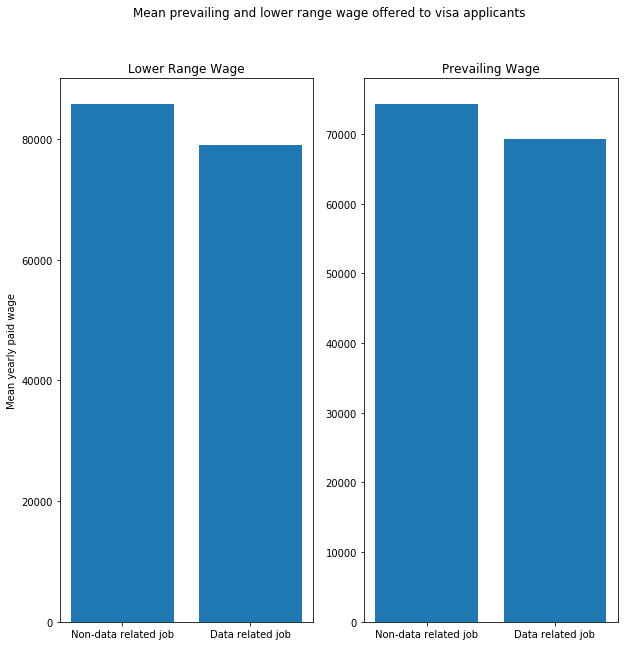

In [14]:
x_values = dataVsNonData.index
y_values = dataVsNonData['YEARLY_PAID_WAGE']['mean']

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.bar(x_values, y_values)
plt.xticks(x_values, ('Non-data related job', 'Data related job'))
plt.ylabel('Mean yearly paid wage')
plt.title('Lower Range Wage')
plt.subplot(122)
plt.bar(x_values, dataVsNonData['YEARLY_PREV_WAGE']['mean'])
plt.title('Prevailing Wage')
plt.suptitle('Mean prevailing and lower range wage offered to visa applicants')
plt.xticks(x_values, ('Non-data related job', 'Data related job'))

# Part 2
## Salary differences between two data-related jobs based on visa app type

In [15]:
#Comparison of data analyst vs data scientist for wages based on visa type
salaryVsVisa = pd.concat([dAnal_jobs, dScien_jobs]).groupby(['JOB_TITLE_SUBGROUP', 'VISA_CLASS'])[['YEARLY_PAID_WAGE','YEARLY_PREV_WAGE']].aggregate(['min','max','mean','count'])
salaryVsVisa

YEARLY_PAID_WAGE                           \
                                                min       max           mean   
JOB_TITLE_SUBGROUP VISA_CLASS                                                  
data analyst       E-3 Australian           44000.0  120000.0   85171.315789   
                   H-1B                     27573.0  220000.0   69053.379723   
                   H-1B1 Singapore          46000.0   97500.0   75760.181818   
                   greencard                46000.0  746323.0   90197.100000   
data scientist     E-3 Australian           77709.0  160000.0  116022.133333   
                   H-1B                     39083.0  230000.0  107477.679914   
                   H-1B1 Chile              90000.0   90000.0   90000.000000   
                   greencard                45323.0  220000.0  116507.759388   

                                         YEARLY_PREV_WAGE            \
                                   count              min       max   
JOB_TITLE_SUBGROUP VISA_CLASS                                         
data analyst       E-3 Australian     19          43638.0   95014.0   
                   H-1B             3680          18658.0  150758.0   
                   H-1B1 Singapore    11          43514.0   97500.0   
                   greencard         125          34653.0  134534.0   
data scientist     E-3 Australian     15          77709.0  133058.0   
                   H-1B             1161          35090.0  178360.0   
                   H-1B1 Chile         1          57678.0   57678.0   
                   greencard          49          32427.0  133723.0   

                                                         
                                             mean count  
JOB_TITLE_SUBGROUP VISA_CLASS                            
data analyst       E-3 Australian    68925.631579    19  
                   H-1B              62062.882530  3680  
                   H-1B1 Singapore   71571.818182    11  
                   greencard         75974.384000   125  
data scientist     E-3 Australian   103628.133333    15  
                   H-1B              90586.219035  1161  
                   H-1B1 Chile       57678.000000     1  
                   greencard         85211.306122    49

# Part 3
## How data related compare with non-data related jobs with respect to visa application

In [16]:
#Used to format the two different date-time formats in 'DECISION_DATE' col properly
jobs['FORMATTED_DEC_DATE'] = pd.to_datetime(jobs['DECISION_DATE'], format='%Y-%d-%m %H:%M:%S', errors='coerce')
mask = jobs.FORMATTED_DEC_DATE.isnull()
jobs.loc[mask, 'FORMATTED_DEC_DATE'] = pd.to_datetime(jobs[mask]['DECISION_DATE'], format='%m/%d/%Y',
                                             errors='coerce')

In [17]:
#Used to format the two different date-time formats in 'CASE_RECEIVED_DATE' col properly
jobs['FORMATTED_REC_DATE'] = pd.to_datetime(jobs['CASE_RECEIVED_DATE'], format='%Y-%d-%m %H:%M:%S', errors='coerce')
mask = jobs.FORMATTED_REC_DATE.isnull()
jobs.loc[mask, 'FORMATTED_REC_DATE'] = pd.to_datetime(jobs[mask]['CASE_RECEIVED_DATE'], format='%m/%d/%Y',
                                             errors='coerce')

In [18]:
jobs['WAITING_TIME_SEC'] = jobs['FORMATTED_DEC_DATE'] - jobs['FORMATTED_REC_DATE']
jobs['WAITING_TIME_SEC'] = jobs['WAITING_TIME_SEC'].astype('timedelta64[s]')

In [19]:
#Converting waiting time from seconds to day for easier analysis purposes
jobs['WAITING_TIME_DAY'] = jobs['WAITING_TIME_SEC'] / 3600 / 24

In [20]:
#Checking to see if any problems, ie. decision date - waiting time < 0, which doesn't make sense
any(jobs['WAITING_TIME_DAY']) < 0

False

In [21]:
dataVsNonDataVisa = jobs.groupby(['CASE_STATUS', 'DATA_RELATED'])[['YEARLY_PAID_WAGE', 'YEARLY_PREV_WAGE', 'WAITING_TIME_DAY']].aggregate(['min','max','mean','count'])
dataVsNonDataVisa

YEARLY_PAID_WAGE                             \
                                              min         max           mean   
CASE_STATUS         DATA_RELATED                                               
certified           False                 10237.5  2400000.00   85417.922861   
                    True                  27573.0   230000.00   78622.985115   
certified-expired   False                 18510.0   500000.00  100276.207162   
                    True                  47992.0   746323.00  111969.790727   
certified-withdrawn False                 10920.0  1103711.73   87642.095607   
                    True                  35000.0   185000.00   80328.418049   
denied              False                  9847.5  2400000.00   76395.413631   
                    True                  35526.0   150000.00   72253.724156   
withdrawn           False                 16575.0  2500000.00   89703.387588   
                    True                  43410.0   165000.00   80512.388270   

                                         YEARLY_PREV_WAGE            \
                                   count              min       max   
CASE_STATUS         DATA_RELATED                                      
certified           False         135420           9847.5  411200.0   
                    True            4416          18658.0  178360.0   
certified-expired   False           3171          16690.0  209102.0   
                    True              55          32427.0  134534.0   
certified-withdrawn False          13810           9847.5  283628.0   
                    True             328          28080.0  157435.0   
denied              False           4103           9847.5  987675.0   
                    True              77          36296.0  160850.0   
withdrawn           False           5403          15853.5  890000.0   
                    True             185          35174.0  157602.0   

                                                       WAITING_TIME_DAY  \
                                          mean   count              min   
CASE_STATUS         DATA_RELATED                                          
certified           False         74256.350708  135420              4.0   
                    True          69148.070337    4416              4.0   
certified-expired   False         87661.339713    3171            122.0   
                    True          82762.636364      55            130.0   
certified-withdrawn False         73159.093055   13810              4.0   
                    True          69570.639024     328              4.0   
denied              False         68481.082254    4103              0.0   
                    True          66116.103896      77              1.0   
withdrawn           False         74903.344388    5403              0.0   
                    True          70936.236757     185              0.0   

                                                              
                                     max        mean   count  
CASE_STATUS         DATA_RELATED                              
certified           False         2278.0   17.481347  135420  
                    True           598.0   11.405344    4416  
certified-expired   False         1179.0  182.178808    3171  
                    True           584.0  217.836364      55  
certified-withdrawn False         1748.0  357.147864   13810  
                    True          1160.0  329.323171     328  
denied              False         2494.0  120.242262    4103  
                    True          2048.0   49.246753      77  
withdrawn           False         1253.0  137.926337    5403  
                    True           961.0   50.351351     185

# Part 4 
## How do annual wages (across all job types) paid compare across all different states?

In [33]:
jobs['WORK_STATE'].unique()

array(['CALIFORNIA', 'CA', 'NY', 'WA', 'MD', 'OR', 'DC', 'MN', 'GA', 'OH',
       'FL', 'IN', 'AZ', 'NE', 'KY', 'IA', 'LA', 'WI', 'TN', 'AL', 'MI',
       'IL', 'MICHIGAN', 'SC', 'AR', 'TEXAS', 'TX', 'ID', 'NEW YORK',
       'MA', 'CT', 'VA', 'NM', 'NJ', 'NEW JERSEY', 'FLORIDA', 'WV',
       'PENNSYLVANIA', 'PA', 'CO', 'COLORADO', 'OK', 'ARIZONA', 'NC',
       'DISTRICT OF COLUMBIA', 'MO', 'NEW MEXICO', 'UT', 'MARYLAND', 'NV',
       'ALABAMA', 'MS', 'NH', 'NEW HAMPSHIRE', 'MISSISSIPPI', 'VIRGINIA',
       'MASSACHUSETTS', 'GEORGIA', 'MINNESOTA', 'OHIO', 'WASHINGTON',
       'MISSOURI', 'RI', 'DELAWARE', 'KS', 'NORTH CAROLINA', 'DE',
       'CONNECTICUT', 'RHODE ISLAND', 'OREGON', 'ILLINOIS', 'AK',
       'INDIANA', 'HI', 'UTAH', 'OKLAHOMA', 'LOUISIANA', 'VERMONT',
       'SOUTH CAROLINA', 'ND', 'IOWA', 'NEBRASKA', 'VT', 'KANSAS', 'ME',
       'MAINE', 'WISCONSIN', 'NEVADA', 'ARKANSAS', 'TENNESSEE', 'MT',
       'KENTUCKY', 'MONTANA', 'ALASKA', 'IDAHO', 'VI', 'SD',
       'SOUTH DAKOTA

In [34]:
len(jobs['WORK_STATE'].unique())

110

In [22]:
annualWagesAcrossStatesByJob = jobs.groupby(['WORK_STATE','JOB_TITLE_SUBGROUP'])[['YEARLY_PAID_WAGE', 'YEARLY_PREV_WAGE']].aggregate(['min','max','mean','count'])
annualWagesAcrossStatesByJob

YEARLY_PAID_WAGE              \
                                                 min         max   
WORK_STATE    JOB_TITLE_SUBGROUP                                   
AK            assistant professor           48750.00   141334.00   
              business analyst              51438.00    80900.16   
              software engineer             60000.00    95000.00   
              teacher                       17550.00    74318.00   
AL            assistant professor           41500.00   574000.00   
              attorney                      52026.00   188594.00   
              business analyst              36000.00    80000.00   
              data analyst                  52500.00   105300.00   
              management consultant         99008.00    99008.00   
              software engineer             49650.00  1400000.00   
              teacher                       37716.00    55969.00   
ALABAMA       assistant professor           54200.00   279999.96   
              attorney                      75754.00   108000.00   
              software engineer             84656.00   139776.00   
ALASKA        assistant professor           49732.80    88867.00   
              software engineer             66914.00    67000.00   
AR            assistant professor           27000.00   450000.00   
              business analyst              36046.00    85000.00   
              data analyst                  50000.00    85000.00   
              data scientist                70000.00    85000.00   
              management consultant         51500.00    51500.00   
              software engineer             43410.00   149760.00   
              teacher                       21500.00    60504.00   
ARIZONA       assistant professor           55000.00   290000.00   
              business analyst              65800.00    92394.00   
              data analyst                  50000.00    59527.00   
              software engineer             61422.00   137500.00   
              teacher                       31790.00    59923.00   
ARKANSAS      assistant professor           50397.00   450000.00   
              software engineer             74380.00    94786.00   
...                                              ...         ...   
WASHINGTON    data scientist               106000.00   121435.00   
              management consultant        112000.00   112000.00   
              software engineer             73174.00   195000.00   
              teacher                       58986.00    66571.00   
WEST VIRGINIA assistant professor           50000.00   291863.00   
              attorney                     115000.00   115000.00   
WI            assistant professor           39440.00   369020.00   
              attorney                      80000.00   100000.00   
              business analyst              40950.00   165000.00   
              data analyst                  38000.00    90438.00   
              data scientist                80000.00    90000.00   
              management consultant         98550.00    98550.00   
              software engineer             50000.00   152000.00   
              teacher                       28680.00    70210.00   
WISCONSIN     assistant professor           43430.00   249000.00   
              attorney                      46634.00    46634.00   
              business analyst              92781.00    92781.00   
              software engineer             71411.00    96928.00   
              teacher                       55535.00    55535.00   
WV            assistant professor           37580.00   473282.00   
              attorney                      98535.00    98535.00   
              business analyst              43000.00    75000.00   
              software engineer             48000.00   130000.00   
              teacher                       33587.00    53073.00   
WY            assistant professor           52008.00   123564.00   
              attorney  

In [29]:
annualWagesAcrossStates = jobs.groupby('WORK_STATE')[['YEARLY_PAID_WAGE', 'YEARLY_PREV_WAGE']].aggregate(['min','max','mean','count'])
annualWagesAcrossStates

YEARLY_PAID_WAGE                                    \
                                  min         max           mean  count   
WORK_STATE                                                                
AK                            17550.0   141334.00   75748.807797     59   
AL                            36000.0  1400000.00   95501.739778    541   
ALABAMA                       54200.0   279999.96  106907.266471     17   
ALASKA                        49732.8    88867.00   70085.633333      6   
AR                            21500.0   450000.00   86444.772384    537   
ARIZONA                       31790.0   290000.00   74633.704951    206   
ARKANSAS                      38500.0   450000.00  202997.857143     21   
AZ                            19094.0   333000.00   70560.869585   2364   
CA                            20514.0   990000.00  102388.031847  42630   
CALIFORNIA                    20190.0   746323.00  113662.750945   4105   
CO                            19071.0   335000.00   74276.448630   1525   
COLORADO                      38750.0   193625.00   92337.786591     88   
CONNECTICUT                   34986.0   172000.00   83842.567073     82   
CT                            27826.5   375000.00   79113.387629   1940   
DC                            19558.5  2500000.00   81637.897451   1322   
DE                            22880.0   185000.00   70598.789575    823   
DELAWARE                      25626.0   122500.00   90271.603137     51   
DISTRICT OF COLUMBIA          18510.0   210000.00   80738.388889     45   
FL                            17300.0   500000.00   71748.512034   3894   
FLORIDA                       38000.0   500000.00   88646.277055    163   
GA                            20550.0   870000.00   71335.700663   5384   
GEORGIA                       32000.0   315000.00   88289.085439    228   
GU                            21470.0    90000.00   37455.879310     58   
GUAM                          48557.0    48557.00   48557.000000      1   
HAWAII                        64008.0    84500.00   69103.000000      8   
HI                            25000.0   175000.00   71138.329506    162   
IA                            31149.0   303751.50   78513.336373    954   
ID                            28587.0   226500.00   68379.973708    178   
IDAHO                         31750.0    87714.00   62427.066667      6   
IL                            18730.0  1103711.73   76453.561161   7053   
...                               ...         ...            ...    ...   
PENNSYLVANIA                  44300.0   275000.00   92833.472134    314   
PR                            16360.5   107250.00   52844.385234    107   
PUERTO RICO                   45000.0    45000.00   45000.000000      1   
PW                            60000.0    60000.00   60000.000000      1   
RHODE ISLAND                  62000.0   135000.00   89726.142857     21   
RI                            37050.0   136000.00   73516.356792    505   
SC                            16575.0   239484.00   61173.083961    818   
SD                            33469.0   115000.00   60975.846154     91   
SOUTH CAROLINA                33610.0   142000.00   69141.178571     28   
SOUTH DAKOTA                  45415.0    80000.00   64317.857143     14   
TENNESSEE                     40320.0   130000.00   74643.098462     39   
TEXAS                         29860.0   290000.00   80545.547717   1012   
TN                            22000.0   500000.00   70691.682708   1045   
TX                            17287.0  1224800.60   71889.407716  14395   
UT                            15600.0   895000.00   76710.433115    719   
UTAH                          44250.0   248676.00   90034.434211     38   
VA                            19812.0   420000.00   74250.528912   5708   
VERMONT                       47845.5   106500.00   92258.763171     41   
VI                            32292.0    99788.00   42697.084433     97   
VIRGIN ISLANDS                32000.0    42100

# Part 5
## Offered salaries of non-greencard with prevailing wages of PR (greencard holders) in two data-related jobs

In [24]:
dAnal_jobs.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE',
       'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED',
       'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED',
       'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY',
       'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED',
       'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS',
       'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE',
       'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE',
       'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'JOB_TITLE_SUBGROUP',
       'YEARLY_PAID_WAGE', 'YEARLY_PREV_WAGE', 'DATA_RELATED'],
      dtype='object')

In [25]:
#Comparison of data analyst vs data scientist for wages based on visa type
data_jobs = jobs[jobs['JOB_TITLE_SUBGROUP'].str.match('data')]
dAnal_jobs['GREENCARD'] = dAnal_jobs['VISA_CLASS'].str.match('greencard')
dScien_jobs['GREENCARD'] = dScien_jobs['VISA_CLASS'].str.match('greencard')

C:\Users\Nexez\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nexez\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
offered_salaries = pd.concat([dAnal_jobs, dScien_jobs]).groupby(['JOB_TITLE_SUBGROUP', 'GREENCARD'])[['YEARLY_PAID_WAGE','YEARLY_PREV_WAGE']].aggregate(['min','max','mean','count'])

In [27]:
all_jobs = jobs.groupby("JOB_TITLE_SUBGROUP")['CASE_NUMBER'].aggregate('count')
all_jobs

JOB_TITLE_SUBGROUP
assistant professor      18836
attorney                  1486
business analyst         27777
data analyst              3835
data scientist            1226
management consultant      767
software engineer        99230
teacher                  13811
Name: CASE_NUMBER, dtype: int64

In [32]:
#Write everything to excel
def write_to_excel():
    with pd.ExcelWriter("output2.xlsx") as writer:
        dataVsNonData.to_excel(writer, sheet_name="part1")
        salaryVsVisa.to_excel(writer, sheet_name="part2")
        dataVsNonDataVisa.to_excel(writer, sheet_name="part3")
        annualWagesAcrossStatesByJob.to_excel(writer, sheet_name="part4")
        annualWagesAcrossStates.to_excel(writer, sheet_name="part4-2")
        offered_salaries.to_excel(writer, sheet_name="part5")
        all_jobs.to_excel(writer, sheet_name="overview")
        

#########################################
#Uncomment this line to get excel output#
#########################################
#write_to_excel()